## Implementation of Linear regression using python

In [33]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load the dataset

In [46]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


### Standardize numerical features

In [47]:
col=["Height","Weight"]
S1=MinMaxScaler()
df1[col]=S1.fit_transform(df1[col])
df1


,Gender,Height,Weight
0,Male,0.165212,0.863139
1,Male,0.122482,0.475476
2,Male,0.167432,0.721131
3,Male,0.147361,0.756699
4,Male,0.131761,0.689999
...,...,...,...
9995,Female,0.100470,0.351101
9996,Female,0.108016,0.517161
9997,Female,0.081028,0.310660
9998,Female,0.968224,0.482988


## Prepare dependant and independant variables

In [48]:
X=df1[["Height"]].to_numpy()
Y=df1[["Weight"]].to_numpy()
Y.shape

(10000, 1)

## Split the data into training and test set

In [49]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=67)

In [50]:
# Create a linear regression model

model=LinearRegression()



Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [51]:
## Training  Linear regressions model

In [52]:
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
## Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

# Print model coefficients
print(model.coef_[0])
print(model.intercept_)

0.004438047889011704
0.8135299373473699
[3.54709605]
[0.10829265]


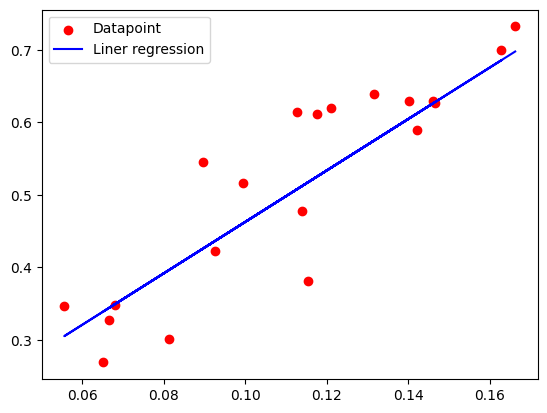

In [54]:
# Plot the linear regression Model
plt.scatter(X_test[0:20],Y_test[0:20],color="Red",label="Datapoint")
plt.plot(X_test[0:20],Y_pred[0:20],color="Blue",label="Liner regression")
plt.legend()


In [55]:
## Load the Height and weight  to indipendent and dependent variable

In [56]:
df2=pd.read_csv("weight-height.csv")
X = df2['Height'].values.reshape(-1, 1)
X.shape
Y=df2["Weight"].values

In [57]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization).
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)


In [44]:
#add another feature to X corresponding to bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1.0, 7.93, 12, 'Low', 'Windy'],
       [1.0, 16.42, 20, 'Medium', 'Clear'],
       [1.0, 9.52, 28, 'Low', 'Foggy'],
       ...,
       [1.0, 15.62, 26, 'High', 'Snowy'],
       [1.0, 14.17, 8, 'Low', 'Clear'],
       [1.0, 6.63, 24, 'Low', 'Foggy']], dtype=object)

In [62]:
#weight or parameter initialization
theta = np.zeros(X.shape[1])
iterations=1000
# Hyperparameters
learningrate=0.01
# Gradient Descent
mseh=[]
print(X.shape)
s=(y_pred - Y)
print(s.shape)
m=X.T
print(m.shape)

(10000, 1)
(10000,)
(1, 10000)


<img src="https://i.postimg.cc/wMYVXD65/1.png" alt="Image Description" width="500">

In [60]:
for i in range(iterations):
    y_pred = np.dot(X, theta)
    mse = mean_squared_error(Y, y_pred)
    mseh.append(mse)
    print(f"Iteration {i+1}: MSE = {mse}")
    gradient = np.dot(X.T, (y_pred - Y)) / len(Y)
    theta -= learningrate * gradient

Iteration 1: MSE = 1.0
Iteration 2: MSE = 0.9858094192775753
Iteration 3: MSE = 0.9719012311115264
Iteration 4: MSE = 0.9582698158899821
Iteration 5: MSE = 0.9449096658313463
Iteration 6: MSE = 0.9318153827588777
Iteration 7: MSE = 0.9189816759195509
Iteration 8: MSE = 0.9064033598463269
Iteration 9: MSE = 0.8940753522629601
Iteration 10: MSE = 0.881992672030502
Iteration 11: MSE = 0.87015043713467
Iteration 12: MSE = 0.8585438627132651
Iteration 13: MSE = 0.8471682591228462
Iteration 14: MSE = 0.8360190300438765
Iteration 15: MSE = 0.8250916706235785
Iteration 16: MSE = 0.8143817656557442
Iteration 17: MSE = 0.8038849877967698
Iteration 18: MSE = 0.7935970958171892
Iteration 19: MSE = 0.7835139328880022
Iteration 20: MSE = 0.7736314249011058
Iteration 21: MSE = 0.763945578823149
Iteration 22: MSE = 0.7544524810821431
Iteration 23: MSE = 0.7451482959861836
Iteration 24: MSE = 0.7360292641736336
Iteration 25: MSE = 0.7270917010941532
Iteration 26: MSE = 0.7183319955199545
Iteration 27: 

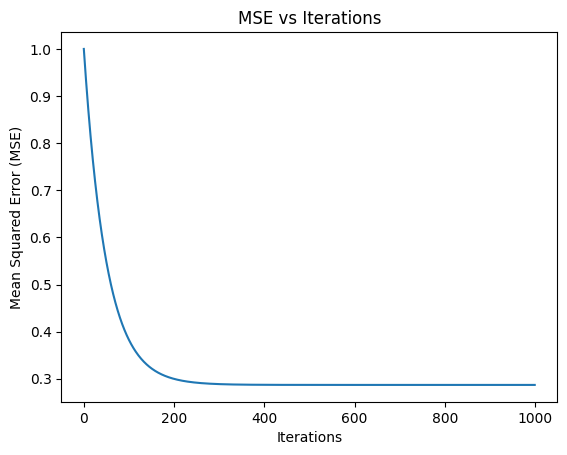

In [61]:
# Plot the MSE over iterations
plt.plot(range(iterations), mseh)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Iterations')
plt.show()

## You are required to fit a linear function on Food_delivery_times dataset
Description about the dataset: This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and Preperation time.
1. Feature selection: Consider Food_delivery_time is effected by four features (attributes) given in the dataset, which are Distance_km, Preparation_Time_min, Traffic, Weather
2. Since Traffic, Weather are having categorical values, you need to convert them into numerical using the categorical encoding methods.
3. Now, fit a linear regression model considering Distance_km, Preparation_Time_min, Traffic, and Weather as independant variables and Delivery_Time_min as dependant varibal.


Note: In lab record, you can write the statements relevant to linear regression.

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Food_Delivery_Times - Food_Delivery_Times.csv')
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

for col in ['Weather', 'Traffic_Level', 'Courier_Experience_yrs']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print("\nMissing values handled.")

First 5 rows of the dataset:
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (tota

/tmp/ipython-input-3433573648.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [29]:
features = ['Distance_km', 'Preparation_Time_min', 'Traffic_Level', 'Weather']
target = 'Delivery_Time_min'

X = df[features]
y = df[target]
X_encoded = pd.get_dummies(X, columns=['Traffic_Level', 'Weather'], drop_first=True)

print("Encoded feature set (X_encoded):")
print(X_encoded.head())

Encoded feature set (X_encoded):
   Distance_km  Preparation_Time_min  Traffic_Level_Low  Traffic_Level_Medium  \
0         7.93                    12               True                 False   
1        16.42                    20              False                  True   
2         9.52                    28               True                 False   
3         7.44                     5              False                  True   
4        19.03                    16               True                 False   

   Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Windy  
0          False          False          False           True  
1          False          False          False          False  
2           True          False          False          False  
3          False           True          False          False  
4          False          False          False          False  


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X_encoded.columns, columns=['Coefficient'])
print(coefficients)


Model Performance:
Mean Squared Error (MSE): 79.78
R-squared (R²): 0.82

Model Coefficients:
                      Coefficient
Distance_km              2.998118
Preparation_Time_min     0.988691
Traffic_Level_Low      -10.765431
Traffic_Level_Medium    -5.116137
Weather_Foggy            6.083908
Weather_Rainy            4.460979
Weather_Snowy            9.401855
Weather_Windy            1.162306


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Food_Delivery_Times - Food_Delivery_Times.csv')

print("--- Initial Data ---")
print(df.head())
print("\n")
df.info()
print("\n")

for col in ['Weather', 'Traffic_Level', 'Courier_Experience_yrs']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
print("--- Missing values handled --- \n")

features = ['Distance_km', 'Preparation_Time_min', 'Traffic_Level', 'Weather']
target = 'Delivery_Time_min'
X = df[features]
y = df[target]

X_encoded = pd.get_dummies(X, columns=['Traffic_Level', 'Weather'], drop_first=True)
print("--- Encoded Feature Set (First 5 rows) ---")
print(X_encoded.head())
print("\n")

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("\n")

print("--- Model Coefficients ---")
coefficients = pd.DataFrame(model.coef_, X_encoded.columns, columns=['Coefficient'])
print(coefficients)

--- Initial Data ---
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Co

/tmp/ipython-input-1032625645.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
